# Defining Quantum Circuits

## 1. Introduction

これまで、様々な1qubitおよびマルチqbitゲートを見てきました。これらのゲートを他のコンポーネントと組み合わせて使用して、量子回路を構築する方法見てきました。

実際の量子コンピュータに量子アルゴリズムを実装する前に、これらのアルゴリズムを実装する量子回路を構築するため、量子回路の定義を具体的に強調することが大切です。

## 2. What is a Quantum Circuit?

量子回路は、qubitなどの量子データに対するコヒーレントな量子演算と、同時のリアルタイム古典計算からなる計算ルーチンです。これは、量子ゲート、測定、およびリセットの順序づけられたシーケンスであり、これらは全て条件付きであり、リアルタイムの古典的な計算からのデータを使用できます。

量子ゲートのセットは、量子データの任意のユニタリ変換が、セット内のゲートのシーケンスと同様に効率的に、任意に近似できる場合、普遍的であると言われています。量子プログラムは、一連の量子回路と非平行な古典計算によって表すことができます。

## 3. Example : Quantum Teleportation

以下の量子回路を見てください。次のセクションでは、"quantum teleportation algorithm(量子テレポーテーションアルゴリズム)"を実装することを学びます。取り敢えず、量子回路の構成要素を見れば十分です。

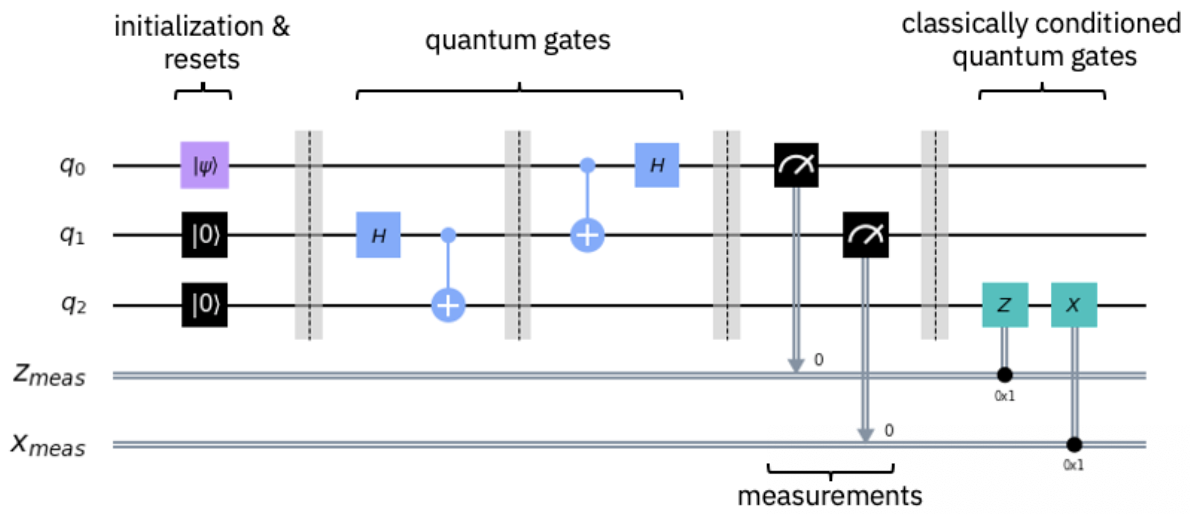

量子回路は3つのqubitと2つの古典的なbitを使用します。この量子回路には4つの主要コンポーネントがあります。

### Initialization and reset

まず、明確な量子状態から量子計算を開始する必要があります。これは、初期化およびリセット操作を使用することで実現されます。リセットは、1qubitゲートと、測定を通じて目的の状態を正常に作成したかどうかを監視する同時リアルタイム古典計算の組み合わせによって実行できます。後に1qubitゲートを適用できる、|ψ>を実行し、q0を目的の状態に初期化します。

### Quantum gates

次に、テレポーテーションアルゴリズムの要求に応じて、3つのqubitを操作する一連の量子ゲートを適用します。この場合、1qubit アダマールゲート(H)と2qubit Controlled-X(⊕)のみを適用しています。

### Measurements

3番目に、3つのqubitのうち2つを測定します。古典的なコンピュータは、各qubitの測定値を古典的な結果(0または1)として解釈し、2つの古典的なbitに格納します。

### Classially conditioned quantum gates

4番目に、3番目のqubitに1qubitのZゲートおよびXゲートを適用します。これらのゲートは、2つの古典的なビットに格納されている測定結果に基づいて調整されます。この場合、同じ量子回路内で、古典計算の結果をリアルタイムで同時に使用しています。

## 4. Example : Variational Quantum Eigensolvers

これが量子プログラムの例です。次の章で、"variational quantum eigensolver"を実装することを学びます。このプログラムでは、古典的なコンピュータが量子コンピュータと協調して非平行に動作します。

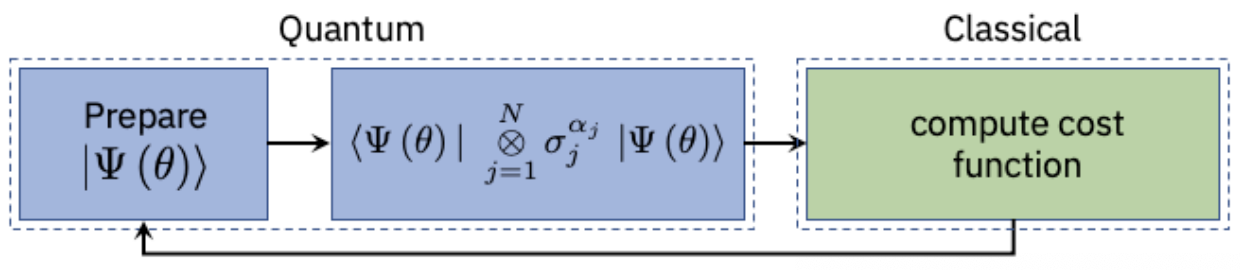

### The quantum block

上記の例1と同様に、量子状態|ψ(θ)>は、リセットをシングルおよびマルチキュービット量子ゲートと組み合わせることによって準備されます。ここで、状態のパラメーターは、量(θ)を使用してパラメーター化されます。準備が整ったら、量子ゲートを使用して量子状態を操作し、測定します。量子ブロック内の全ての操作は、量子回路で構成されています。

### The classical block

量子状態が測定されると、古典コンピュータはそれらの測定結果を解釈し、目的のあアプリケーションように選択されたコスト関数を使用してコストを計算します。このコストに基づいて、古典的なコンピュータはパラメーター(θ)の別の値を決定します。

### Combined operation

古典コンピュータがθの次のパラメーターを決定すると、一連のリセット、シングルおよびマルチキュービットゲートが量子回路で|ψ(θ)>を準備するために使用され、このプロセスは測定された量子のコストまでか、状態が安定する、または別の所定の結果が満たされるまで続きます。

## 5. Why the Classical Parts?

古典コンピュータができることであれば、普遍的な量子コンピュータは全て実行できますが、量子状態は壊れやすいため、量子回路に古典的な部分を追加することが多い。

qubitを測定すると、その状態が崩れ、多くの情報が破壊されます。全ての測定は情報を破壊することなので、理論的には常に最後に測定し、計算上の利点を失うことはありません。しかし実際には、早期測定は多くの実用的な利点を提供します。

例えば、テレポーテーション回路では、qubitを測定して、量子チャネルの代わりに古典チャネルを介して情報を送信できるようにします。利点は、古典的なチャネルが非常に安定していることですが、チャネルを作成するのは非常に難しいため、量子情報を他の人々に送信する方法は実際にはありません。

variational quantum eigensolverの例では、計算を小さな量子計算に分割すると、実際にはいくつかの計算上の利点が失われますが、qubitが重ね合わされる時間を短縮することにより、ノイズの多いハードウェアでこれを補います。つまり、干渉によって結果が不正確になる可能性が低くなります。

最後に、私たちの古典的な日常の世界で量子計算の結果を使用するには、計算の最後にこれらの状態を測定して解釈する必要があります。